<a href="https://colab.research.google.com/github/lalitpandey02/PythonNotebooks/blob/main/Func_API_Multi_output_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [21]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [22]:
# Get the data from UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

In [23]:
# Use pandas excel reader
df = pd.read_excel(URL)

In [24]:
print(df.shape)
df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [25]:
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.62,808.5,367.5,220.50,3.5,5,0.25,4,14.650,15.38
1,0.69,735.0,294.0,220.50,3.5,2,0.40,3,14.320,16.35
2,0.71,710.5,269.5,220.50,3.5,4,0.00,0,6.366,11.29
3,0.74,686.0,245.0,220.50,3.5,3,0.10,3,10.340,13.36
4,0.98,514.5,294.0,110.25,7.0,5,0.25,4,28.620,30.12


In [26]:
# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

In [27]:
print(train_stats.shape)
train_stats

(8, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.763616,671.914495,319.736971,176.088762,5.272801,3.522801,0.235098,2.845277,22.490026,24.782704
std,0.104599,87.349780,44.446299,45.102673,1.751278,1.112865,0.132032,1.541329,10.105019,9.538987
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.940000
25%,0.667500,612.500000,294.000000,122.500000,3.500000,3.000000,0.100000,2.000000,13.000000,15.772500
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,19.350000,22.725000
75%,0.820000,753.375000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.780000,33.290000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,42.960000,48.030000


In [28]:
# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

In [29]:
print(train_stats.shape)
train_stats

(8, 8)


,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.763616,0.104599,0.62,0.6675,0.76,0.820,0.98
X2,614.0,671.914495,87.349780,514.50,612.5000,661.50,753.375,808.50
X3,614.0,319.736971,44.446299,245.00,294.0000,318.50,343.000,416.50
X4,614.0,176.088762,45.102673,110.25,122.5000,147.00,220.500,220.50
X5,614.0,5.272801,1.751278,3.50,3.5000,7.00,7.000,7.00
X6,614.0,3.522801,1.112865,2.00,3.0000,4.00,5.000,5.00
X7,614.0,0.235098,0.132032,0.00,0.1000,0.25,0.400,0.40
X8,614.0,2.845277,1.541329,0.00,2.0000,3.00,4.000,5.00


In [30]:
# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [31]:
# Define model layers.
input_layer = Input(shape=(len(train.columns),))
first_dense = Dense(units='128', activation='relu' )(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 128)          1152        ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 128)          16512       ['dense_6[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 64)           8256        ['dense_7[0][0]']                
                                                                                            

In [32]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [33]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 7ms/step - loss: 233.4436 - y1_output_loss: 111.4957 - y2_output_loss: 121.9478 - y1_output_root_mean_squared_error: 10.5592 - y2_output_root_mean_squared_error: 11.0430 - val_loss: 66.4100 - val_y1_output_loss: 24.8168 - val_y2_output_loss: 41.5932 - val_y1_output_root_mean_squared_error: 4.9816 - val_y2_output_root_mean_squared_error: 6.4493
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 33.3190 - y1_output_loss: 12.8847 - y2_output_loss: 20.4343 - y1_output_root_mean_squared_error: 3.5895 - y2_output_root_mean_squared_error: 4.5204 - val_loss: 54.1968 - val_y1_output_loss: 13.6009 - val_y2_output_loss: 40.5959 - val_y1_output_root_mean_squared_error: 3.6879 - val_y2_output_root_mean_squared_error: 6.3715
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 29.2010 - y1_output_loss: 10.8933 - y2_output_loss: 18.3077 - y1_output_root_mean_squared_error: 3.3005 - y2_output_root_mean_sq

In [36]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 4ms/step - loss: 1.2107 - y1_output_loss: 0.3027 - y2_output_loss: 0.9080 - y1_output_root_mean_squared_error: 0.5502 - y2_output_root_mean_squared_error: 0.9529
Loss = 1.2107082605361938, Y1_loss = 0.30267179012298584, Y1_mse = 0.5501561760902405, Y2_loss = 0.908036470413208, Y2_mse = 0.9529094696044922


5/5 [==============================] - 0s 2ms/step


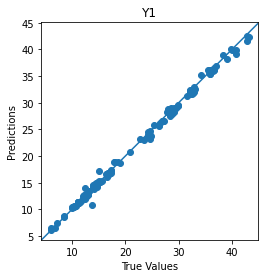

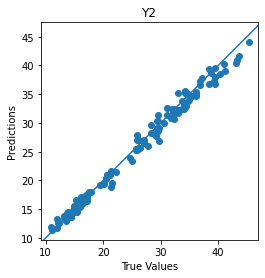

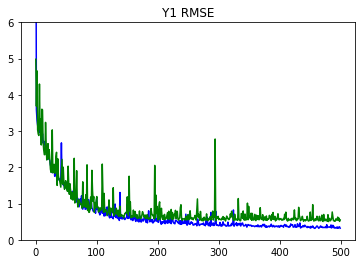

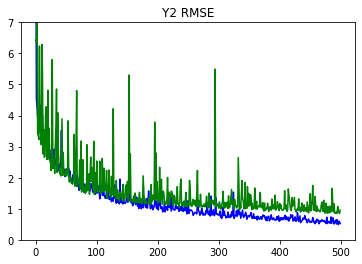

In [37]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)